In [1]:
#import statements

#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#sklearn algorithms
from sklearn import tree

%matplotlib inline

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth', -1)

In [3]:
trainTest = pd.read_csv('trainTest.csv',low_memory = False)

In [4]:
train = trainTest[trainTest['dataType'] == 'train'].copy()
test = trainTest[trainTest['dataType'] == 'test'].copy()

In [5]:
#load label encoder
le = preprocessing.LabelEncoder()

In [6]:
#apply label encoder to train data
train = train.apply(le.fit_transform)

In [7]:
train.head()

,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
0,1,40,0,47,5,3,0,1,5513,28152,7,4,0,0,109,2,1,1,3,10,8,0,6,0,6,1,1,2,2,13,0,2,0,0,0,0,0,0
1,4,51,0,309,2,3,0,1,53253,25573,11,4,0,2,276,2,2,2,9,19,5,1,3,0,6,1,1,4,2,5,0,2,0,0,1,0,0,0
2,5,50,0,300,4,3,0,1,38862,44704,7,4,0,5,247,2,1,1,8,20,0,1,1,0,6,2,1,4,1,24,0,1,0,0,0,0,0,0
3,7,27,0,272,17,14,5,10,474,50370,7,4,0,2,58,2,0,0,12,25,3,0,0,2,6,2,1,4,0,27,0,0,0,0,1,1,0,0
4,4,0,0,104,1,3,0,1,54521,4772,1,1,0,2,0,2,3,3,4,17,5,1,3,0,6,1,1,2,6,12,0,0,0,0,1,0,0,0


In [8]:
#create target variable for validation
target = train.status_group

#remove target variable from train
train = train.drop('status_group',axis =1)

In [9]:
target.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

In [10]:
train.head()

,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
0,1,40,0,47,5,3,0,1,5513,28152,7,4,0,0,109,2,1,1,3,10,8,0,6,6,1,1,2,2,13,0,2,0,0,0,0,0,0
1,4,51,0,309,2,3,0,1,53253,25573,11,4,0,2,276,2,2,2,9,19,5,1,3,6,1,1,4,2,5,0,2,0,0,1,0,0,0
2,5,50,0,300,4,3,0,1,38862,44704,7,4,0,5,247,2,1,1,8,20,0,1,1,6,2,1,4,1,24,0,1,0,0,0,0,0,0
3,7,27,0,272,17,14,5,10,474,50370,7,4,0,2,58,2,0,0,12,25,3,0,0,6,2,1,4,0,27,0,0,0,0,1,1,0,0
4,4,0,0,104,1,3,0,1,54521,4772,1,1,0,2,0,2,3,3,4,17,5,1,3,6,1,1,2,6,12,0,0,0,0,1,0,0,0


In [11]:
#create training & test data for validation
xTrain, xTest, yTrain, yTest = train_test_split(train,target, test_size = .3)

In [12]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(41580, 37) (41580,)
(17820, 37) (17820,)


In [13]:
#import tree
clf = tree.DecisionTreeClassifier()

In [14]:
#fit model
tree_model = clf.fit(xTrain,yTrain)

In [15]:
#make predictions
predictions = tree_model.predict(xTest)

In [21]:
predictions[0:10]

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [27]:
from sklearn.metrics import accuracy_score

#what is this doing 
print(tree_model.score(xTest,yTest))
print(accuracy_score(yTest,predictions))

#these look to be the same thing... Need to mentally figure our how they work

0.750505050505
0.750505050505


In [25]:
yTest

20168    0
27857    0
881      0
12625    2
44315    0
20935    2
54646    0
34829    0
6387     0
2428     2
49895    0
21225    2
29112    2
24320    0
19718    0
53685    2
36699    2
11854    0
52034    0
32382    1
22139    1
19488    2
49464    2
5685     2
37886    0
42349    0
33332    2
43430    0
23198    2
51194    2
        ..
36292    0
11914    0
10482    0
49450    0
32362    0
49961    0
10324    2
27756    0
32429    2
9335     0
22196    0
56808    2
3675     0
53432    2
23557    0
15310    0
33626    0
20100    0
28524    2
59016    2
14089    0
14840    0
19018    0
17708    2
16070    0
38558    0
55080    0
30280    2
26045    2
50988    1
Name: status_group, Length: 17820, dtype: int64

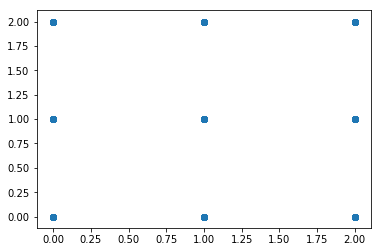

In [23]:
plt.scatter(yTest,predictions)

In [ ]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
#https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-4

0.75050505050505045